In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from __future__ import print_function

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import fetch_california_housing
import xgboost as xgb
sns.set_style("whitegrid")

In [2]:
df=pd.read_csv('Phishing_Legitimate_full 2.csv')

In [3]:
df

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [4]:
df.shape

(10000, 50)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [5]:
df.isna()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.rename(columns={'CLASS_LABEL': 'LABEL'}, inplace=True)

In [8]:
df.drop('id',axis=1,inplace=True)

In [9]:
df.LABEL.value_counts()
unique=df.nunique().sort_values(ascending=True).reset_index()
unique

,index,0
0,HttpsInHostname,1
1,LABEL,2
2,ExtFavicon,2
3,ExtFormAction,2
4,AbnormalFormAction,2
5,EmbeddedBrandName,2
6,DoubleSlashInPath,2
7,FrequentDomainNameMismatch,2
8,FakeLinkInStatusBar,2
9,RightClickDisabled,2


<AxesSubplot:>

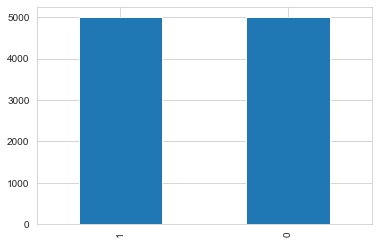

In [10]:
df['LABEL'].value_counts().plot(kind='bar')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumSensitiveWords', ylabel='count'>

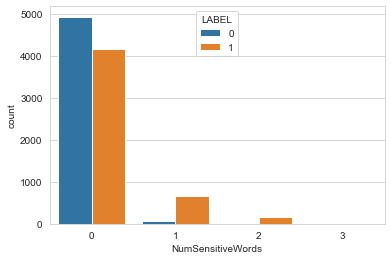

In [11]:
#if the number of sentive word effect to the class label
sns.countplot(df.NumSensitiveWords,hue='LABEL',data=df)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumDashInHostname', ylabel='count'>

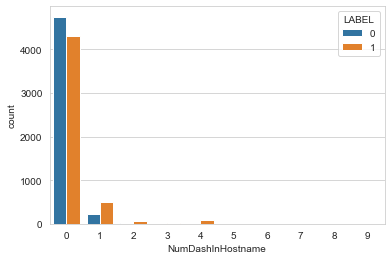

In [12]:
sns.countplot(df.NumDashInHostname, hue='LABEL',data=df)
#the result when we increse the Number of Dash in the host name they cannt efficted 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumHash', ylabel='count'>

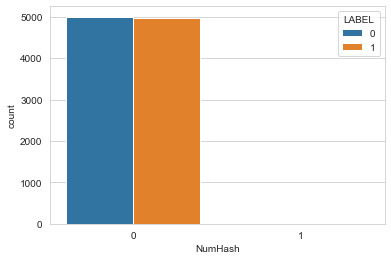

In [13]:
sns.countplot(df.NumHash, hue='LABEL',data=df)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UrlLengthRT', ylabel='count'>

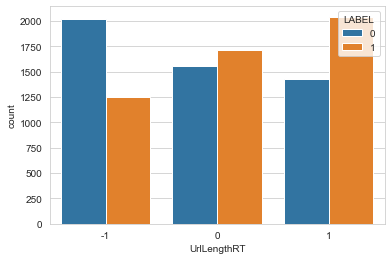

In [14]:
sns.countplot(df.UrlLengthRT, hue='LABEL',data=df)

# detect input and output for modeling

In [15]:
x=df.drop('LABEL',axis=1)
x

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,3,1,5,72,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,-1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,0,1,-1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,1,-1,0
3,3,1,6,79,1,0,0,0,0,0,...,1,0,0,0,1,-1,1,1,1,-1
4,3,0,4,46,0,0,0,0,0,0,...,0,1,0,0,1,1,-1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,0,0,...,0,0,0,0,1,1,-1,1,0,1
9996,2,1,4,59,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
9997,2,1,4,57,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
9998,3,1,1,49,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,1


In [16]:
y=df.LABEL
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: LABEL, Length: 10000, dtype: int64

In [17]:
# train test split 80%-20%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
x_train

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
9254,2,1,2,41,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
1561,3,1,3,40,0,0,0,0,0,1,...,0,0,0,0,1,1,-1,1,-1,1
1670,3,0,4,53,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,-1
6087,3,1,2,89,12,0,0,0,0,0,...,1,0,0,0,1,-1,1,1,1,1
6669,1,0,4,101,6,0,0,0,3,0,...,0,0,0,0,1,-1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2,0,1,60,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
5191,3,1,2,116,1,0,0,0,2,1,...,0,0,0,0,1,-1,1,1,1,1
5390,1,0,5,60,1,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,1
860,2,0,3,50,0,0,0,0,1,0,...,0,0,0,0,1,1,1,1,-1,1


In [19]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [20]:
X_train_scaled

array([[-0.32813661,  0.5685909 , -0.6962499 , ..., -1.53004905,
         1.10140944, -0.34751353],
       [ 0.41467406,  0.5685909 , -0.16287834, ...,  0.39454095,
        -1.55659223,  0.76586583],
       [ 0.41467406, -0.80523187,  0.37049322, ...,  0.39454095,
        -0.22759139, -1.4608929 ],
       ...,
       [-1.07094728, -0.80523187,  0.90386478, ...,  0.39454095,
        -0.22759139,  0.76586583],
       [-0.32813661, -0.80523187, -0.16287834, ...,  0.39454095,
        -1.55659223,  0.76586583],
       [ 0.41467406,  0.5685909 , -1.22962146, ...,  0.39454095,
        -0.22759139,  0.76586583]])

In [21]:
X_test_scaled

array([[-1.07094728, -0.80523187, -0.16287834, ...,  0.39454095,
        -0.22759139,  0.76586583],
       [ 0.41467406,  0.5685909 ,  0.90386478, ...,  0.39454095,
        -1.55659223, -1.4608929 ],
       [-1.07094728, -0.80523187, -0.16287834, ...,  0.39454095,
         1.10140944,  0.76586583],
       ...,
       [-1.07094728, -0.80523187, -1.22962146, ...,  0.39454095,
        -0.22759139,  0.76586583],
       [-1.07094728, -0.80523187,  0.37049322, ...,  0.39454095,
         1.10140944,  0.76586583],
       [-0.32813661,  0.5685909 , -0.6962499 , ...,  0.39454095,
        -0.22759139,  0.76586583]])

# Apply 3 Modleing(

In [22]:
# apply logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [23]:
y_pred = lr.predict(X_test_scaled)

In [24]:
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [25]:
y_test

6252    0
4684    1
1731    1
4742    1
4521    1
       ..
6412    0
8285    0
7853    0
1095    1
6929    0
Name: LABEL, Length: 2000, dtype: int64

In [26]:
# Model evalution  by classifiction report 
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       971
           1       0.95      0.93      0.94      1029

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [27]:
# applay Random Forest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [28]:
y_pred_rf= rf.predict(X_test_scaled)

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       986
           1       0.98      0.98      0.98      1014

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [51]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X_test_scaled, y_test)

In [57]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_scaled)

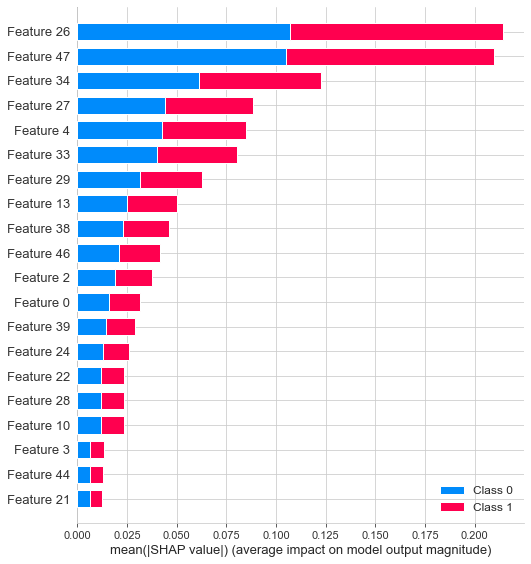

In [58]:
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")

In [30]:
#construct Gauusian naive bayes classifier
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb.score(x_test, y_test)

0.506

In [31]:
y_pred_nb= nb.predict(X_test_scaled)

In [32]:
nb.theta_ # mean of each feature by clas

array([[-0.29073687, -0.03237096, -0.22389966,  0.07286215,  0.36794652,
        -0.15082122,  0.01925268, -0.0919005 ,  0.09642865,  0.06294556,
         0.1394154 ,  0.07461263, -0.04748762, -0.01898195,  0.07435942,
         0.08120937, -0.13394482, -0.09331493,  0.11315985,  0.        ,
        -0.16669729,  0.0772875 ,  0.07647938, -0.0211634 , -0.25299547,
        -0.13953427, -0.25547617,  0.02190165, -0.07405506, -0.31899689,
         0.0701259 ,  0.10594145,  0.145946  , -0.34375376, -0.46310974,
         0.01325836, -0.08100298,  0.07055171,  0.35181265,  0.2318163 ,
        -0.1228948 ,  0.00824084,  0.06950332, -0.16635724, -0.04823642,
        -0.18734531, -0.11363918,  0.53691818],
       [ 0.29248654,  0.03256577,  0.2252471 , -0.07330064, -0.37016085,
         0.15172887, -0.01936855,  0.09245356, -0.09700896, -0.06332437,
        -0.14025441, -0.07506165,  0.0477734 ,  0.01909618, -0.07480692,
        -0.08169809,  0.1347509 ,  0.0938765 , -0.11384085,  0.        ,
   

In [33]:
np.sqrt(nb.sigma_) # variance of each feature by class

array([[7.29719218e-01, 7.61082320e-01, 9.95017656e-01, 9.27129802e-01,
        1.25237088e+00, 4.89892197e-01, 1.41183370e+00, 4.57307357e-01,
        1.18066502e+00, 1.32409233e+00, 1.03966743e+00, 9.72184932e-01,
        3.16227766e-05, 6.43877976e-01, 5.56074516e-01, 9.92527526e-01,
        3.16227766e-05, 6.17464232e-01, 1.01079521e+00, 3.16227766e-05,
        6.80115051e-01, 1.09545849e+00, 9.62857487e-01, 5.33889608e-01,
        3.58760398e-01, 6.70359353e-01, 4.97430594e-01, 8.51638183e-01,
        9.28877867e-01, 1.22296195e+00, 1.03712379e+00, 1.12707997e+00,
        1.23835817e+00, 1.90260457e-01, 3.82509860e-01, 1.08495233e+00,
        5.84224961e-01, 1.39229132e+00, 1.28897943e+00, 1.04881056e+00,
        5.87385901e-01, 1.02241980e+00, 6.92747891e-01, 1.00492111e+00,
        9.79317612e-01, 1.19480970e+00, 7.90242076e-01, 5.14686130e-01],
       [1.14006068e+00, 1.19212881e+00, 9.53326113e-01, 1.06327871e+00,
        3.93608782e-01, 1.31098200e+00, 3.16227766e-05, 1.33363

# heading

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_nb,y_test))

In [35]:
#بنكلمها عليه 
gbm = xgb.XGBRegressor( 
                       n_estimators=15000, #arbitrary large number
                       max_depth=3,
                       objective="reg:squarederror",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(X_train_scaled,y_train),(X_test_scaled,y_test)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_train_scaled, y_train, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=20,
                    verbose=True #gives output log as below
                   )
#Evaluate models with Root Mean Squared Error
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

[0]	validation_0-rmse:0.47003	validation_1-rmse:0.47054
[1]	validation_0-rmse:0.44045	validation_1-rmse:0.44141
[2]	validation_0-rmse:0.40759	validation_1-rmse:0.40842
[3]	validation_0-rmse:0.37885	validation_1-rmse:0.37950
[4]	validation_0-rmse:0.35851	validation_1-rmse:0.35965
[5]	validation_0-rmse:0.33552	validation_1-rmse:0.33686
[6]	validation_0-rmse:0.31568	validation_1-rmse:0.31735
[7]	validation_0-rmse:0.29766	validation_1-rmse:0.29908
[8]	validation_0-rmse:0.28266	validation_1-rmse:0.28383
[9]	validation_0-rmse:0.26893	validation_1-rmse:0.27000
[10]	validation_0-rmse:0.25725	validation_1-rmse:0.25839
[11]	validation_0-rmse:0.24711	validation_1-rmse:0.24826
[12]	validation_0-rmse:0.23879	validation_1-rmse:0.23981
[13]	validation_0-rmse:0.23179	validation_1-rmse:0.23291
[14]	validation_0-rmse:0.22513	validation_1-rmse:0.22618
[15]	validation_0-rmse:0.21973	validation_1-rmse:0.22098
[16]	validation_0-rmse:0.21512	validation_1-rmse:0.21639
[17]	validation_0-rmse:0.21055	validation

[144]	validation_0-rmse:0.14519	validation_1-rmse:0.15588
[145]	validation_0-rmse:0.14514	validation_1-rmse:0.15585
[146]	validation_0-rmse:0.14503	validation_1-rmse:0.15584
[147]	validation_0-rmse:0.14488	validation_1-rmse:0.15581
[148]	validation_0-rmse:0.14485	validation_1-rmse:0.15576
[149]	validation_0-rmse:0.14464	validation_1-rmse:0.15554
[150]	validation_0-rmse:0.14453	validation_1-rmse:0.15553
[151]	validation_0-rmse:0.14423	validation_1-rmse:0.15523
[152]	validation_0-rmse:0.14417	validation_1-rmse:0.15521
[153]	validation_0-rmse:0.14402	validation_1-rmse:0.15509
[154]	validation_0-rmse:0.14398	validation_1-rmse:0.15508
[155]	validation_0-rmse:0.14390	validation_1-rmse:0.15501
[156]	validation_0-rmse:0.14369	validation_1-rmse:0.15491
[157]	validation_0-rmse:0.14363	validation_1-rmse:0.15491
[158]	validation_0-rmse:0.14353	validation_1-rmse:0.15486
[159]	validation_0-rmse:0.14304	validation_1-rmse:0.15448
[160]	validation_0-rmse:0.14282	validation_1-rmse:0.15423
[161]	validati

[286]	validation_0-rmse:0.12865	validation_1-rmse:0.14515
[287]	validation_0-rmse:0.12850	validation_1-rmse:0.14509
[288]	validation_0-rmse:0.12845	validation_1-rmse:0.14509
[289]	validation_0-rmse:0.12838	validation_1-rmse:0.14505
[290]	validation_0-rmse:0.12829	validation_1-rmse:0.14508
[291]	validation_0-rmse:0.12820	validation_1-rmse:0.14507
[292]	validation_0-rmse:0.12805	validation_1-rmse:0.14495
[293]	validation_0-rmse:0.12779	validation_1-rmse:0.14469
[294]	validation_0-rmse:0.12752	validation_1-rmse:0.14457
[295]	validation_0-rmse:0.12734	validation_1-rmse:0.14456
[296]	validation_0-rmse:0.12733	validation_1-rmse:0.14454
[297]	validation_0-rmse:0.12727	validation_1-rmse:0.14451
[298]	validation_0-rmse:0.12720	validation_1-rmse:0.14447
[299]	validation_0-rmse:0.12707	validation_1-rmse:0.14437
[300]	validation_0-rmse:0.12692	validation_1-rmse:0.14429
[301]	validation_0-rmse:0.12683	validation_1-rmse:0.14424
[302]	validation_0-rmse:0.12682	validation_1-rmse:0.14423
[303]	validati

[428]	validation_0-rmse:0.11736	validation_1-rmse:0.13948
[429]	validation_0-rmse:0.11731	validation_1-rmse:0.13946
[430]	validation_0-rmse:0.11715	validation_1-rmse:0.13942
[431]	validation_0-rmse:0.11712	validation_1-rmse:0.13940
[432]	validation_0-rmse:0.11702	validation_1-rmse:0.13936
[433]	validation_0-rmse:0.11687	validation_1-rmse:0.13930
[434]	validation_0-rmse:0.11685	validation_1-rmse:0.13927
[435]	validation_0-rmse:0.11678	validation_1-rmse:0.13925
[436]	validation_0-rmse:0.11676	validation_1-rmse:0.13925
[437]	validation_0-rmse:0.11673	validation_1-rmse:0.13922
[438]	validation_0-rmse:0.11670	validation_1-rmse:0.13920
[439]	validation_0-rmse:0.11669	validation_1-rmse:0.13921
[440]	validation_0-rmse:0.11668	validation_1-rmse:0.13918
[441]	validation_0-rmse:0.11663	validation_1-rmse:0.13917
[442]	validation_0-rmse:0.11662	validation_1-rmse:0.13917
[443]	validation_0-rmse:0.11661	validation_1-rmse:0.13917
[444]	validation_0-rmse:0.11653	validation_1-rmse:0.13915
[445]	validati

[570]	validation_0-rmse:0.10998	validation_1-rmse:0.13665
[571]	validation_0-rmse:0.10993	validation_1-rmse:0.13659
[572]	validation_0-rmse:0.10987	validation_1-rmse:0.13657
[573]	validation_0-rmse:0.10978	validation_1-rmse:0.13656
[574]	validation_0-rmse:0.10968	validation_1-rmse:0.13655
[575]	validation_0-rmse:0.10959	validation_1-rmse:0.13654
[576]	validation_0-rmse:0.10954	validation_1-rmse:0.13659
[577]	validation_0-rmse:0.10948	validation_1-rmse:0.13656
[578]	validation_0-rmse:0.10945	validation_1-rmse:0.13654
[579]	validation_0-rmse:0.10938	validation_1-rmse:0.13653
[580]	validation_0-rmse:0.10935	validation_1-rmse:0.13652
[581]	validation_0-rmse:0.10927	validation_1-rmse:0.13652
[582]	validation_0-rmse:0.10919	validation_1-rmse:0.13653
[583]	validation_0-rmse:0.10917	validation_1-rmse:0.13655
[584]	validation_0-rmse:0.10912	validation_1-rmse:0.13658
[585]	validation_0-rmse:0.10909	validation_1-rmse:0.13656
[586]	validation_0-rmse:0.10905	validation_1-rmse:0.13655
[587]	validati

In [36]:
# predict using n_estimators with lowest validation error
rmse(gbm.predict(X_test_scaled, ntree_limit=gbm.best_ntree_limit),y_test)

C:\Users\User\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


0.1355010700496034

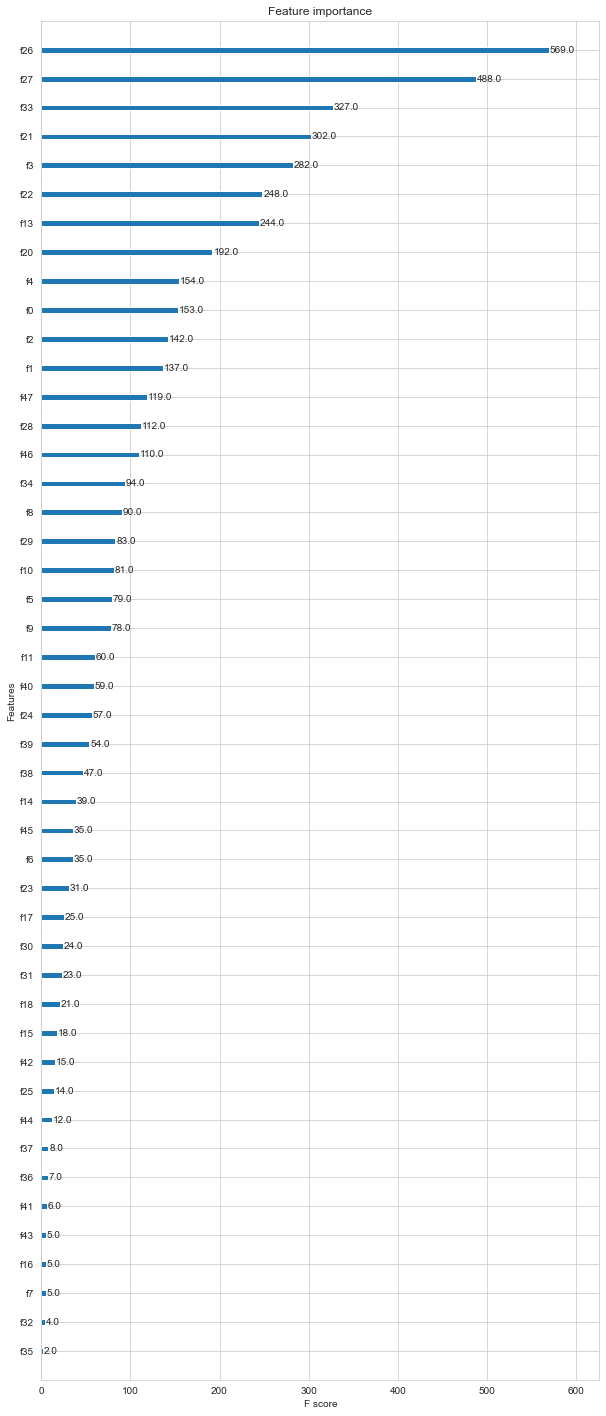

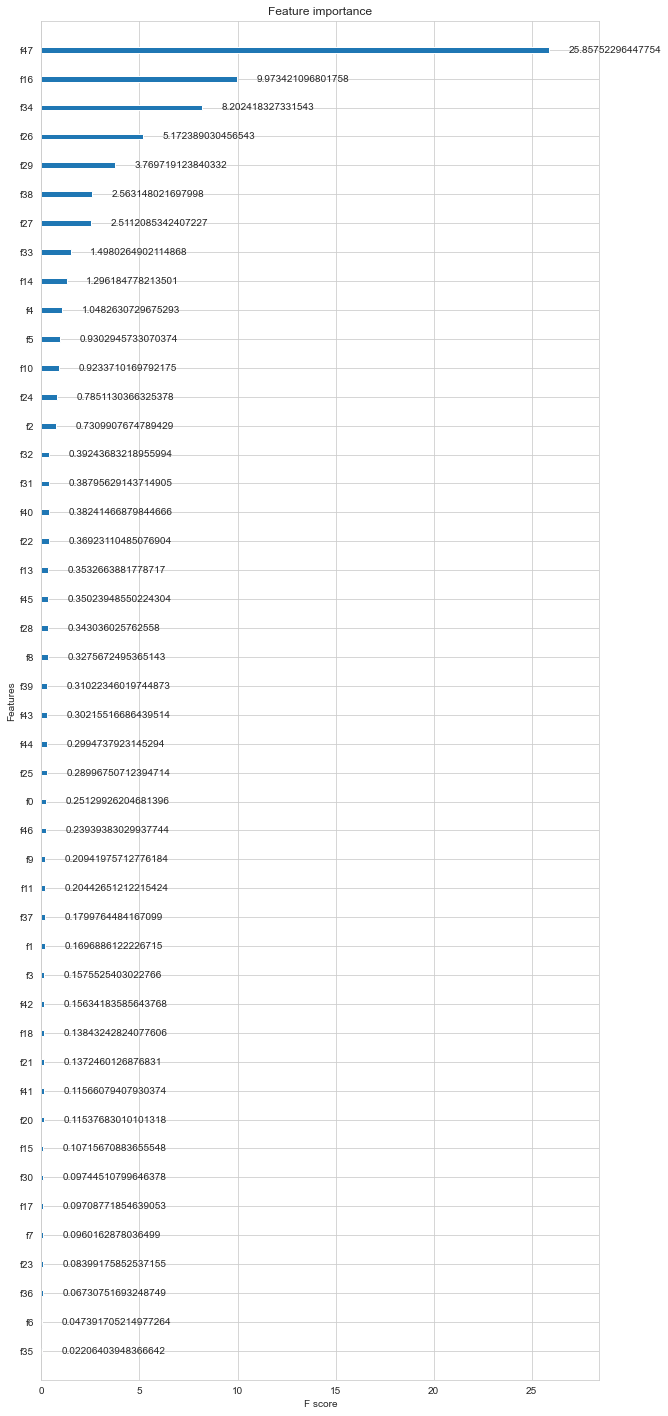

In [59]:
xgb.plot_importance(gbm)
xgb.plot_importance(gbm, importance_type='gain')
plt.rcParams["figure.figsize"] = (20,25)


In [50]:
gbm.get_booster().get_score(importance_type='weight') #extract raw frequency scores

{'f0': 153.0,
 'f1': 137.0,
 'f2': 142.0,
 'f3': 282.0,
 'f4': 154.0,
 'f5': 79.0,
 'f6': 35.0,
 'f7': 5.0,
 'f8': 90.0,
 'f9': 78.0,
 'f10': 81.0,
 'f11': 60.0,
 'f13': 244.0,
 'f14': 39.0,
 'f15': 18.0,
 'f16': 5.0,
 'f17': 25.0,
 'f18': 21.0,
 'f20': 192.0,
 'f21': 302.0,
 'f22': 248.0,
 'f23': 31.0,
 'f24': 57.0,
 'f25': 14.0,
 'f26': 569.0,
 'f27': 488.0,
 'f28': 112.0,
 'f29': 83.0,
 'f30': 24.0,
 'f31': 23.0,
 'f32': 4.0,
 'f33': 327.0,
 'f34': 94.0,
 'f35': 2.0,
 'f36': 7.0,
 'f37': 8.0,
 'f38': 47.0,
 'f39': 54.0,
 'f40': 59.0,
 'f41': 6.0,
 'f42': 15.0,
 'f43': 5.0,
 'f44': 12.0,
 'f45': 35.0,
 'f46': 110.0,
 'f47': 119.0}

In [51]:
gbm.get_booster().get_score(importance_type='gain') #extract raw gain scores

{'f0': 0.25129926204681396,
 'f1': 0.1696886122226715,
 'f2': 0.7309907674789429,
 'f3': 0.1575525403022766,
 'f4': 1.0482630729675293,
 'f5': 0.9302945733070374,
 'f6': 0.047391705214977264,
 'f7': 0.0960162878036499,
 'f8': 0.3275672495365143,
 'f9': 0.20941975712776184,
 'f10': 0.9233710169792175,
 'f11': 0.20442651212215424,
 'f13': 0.3532663881778717,
 'f14': 1.296184778213501,
 'f15': 0.10715670883655548,
 'f16': 9.973421096801758,
 'f17': 0.09708771854639053,
 'f18': 0.13843242824077606,
 'f20': 0.11537683010101318,
 'f21': 0.1372460126876831,
 'f22': 0.36923110485076904,
 'f23': 0.08399175852537155,
 'f24': 0.7851130366325378,
 'f25': 0.28996750712394714,
 'f26': 5.172389030456543,
 'f27': 2.5112085342407227,
 'f28': 0.343036025762558,
 'f29': 3.769719123840332,
 'f30': 0.09744510799646378,
 'f31': 0.38795629143714905,
 'f32': 0.39243683218955994,
 'f33': 1.4980264902114868,
 'f34': 8.202418327331543,
 'f35': 0.02206403948366642,
 'f36': 0.06730751693248749,
 'f37': 0.179976448

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       986
           1       0.98      0.98      0.98      1014

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

